In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

sys.path.append('../')

from src_experiment import NeuralNet, moon_path, wbc_path, get_moons_data, get_wbc_data, train_model
from geobin import RegionTree, TreeNode

In [2]:
hidden_sizes = [5,4,3]
num_classes = 1
model = NeuralNet(
    input_size = 30,
    hidden_sizes = hidden_sizes,
    num_classes = num_classes,
)


# Data
train_data, test_data = get_wbc_data(label_noise=0.0, batch_size=32)

epochs = 50
save_for_epochs = [0,3,6,9,15,25,35,49]


In [3]:
res, states = train_model(
    model=model,
    train_data = train_data,
    test_data = test_data,
    epochs = epochs,
    # save_everyth_epoch = 20,
    save_for_epochs=save_for_epochs,
    RETURN_STATES=True,
)

Training not saved.


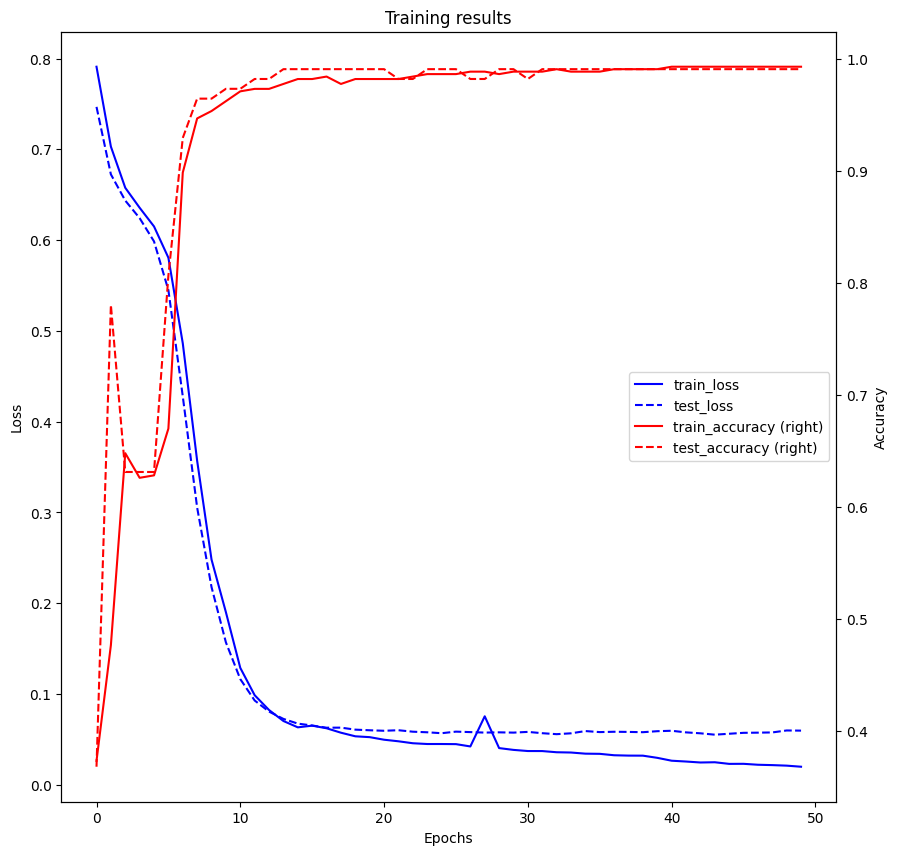

In [4]:
from visualization import plot_training
plot_training(res)

In [5]:
states[0]

OrderedDict([('l1.weight',
              tensor([[-1.6596e-02, -1.5108e-01, -3.7023e-02,  4.3954e-02,  1.4149e-01,
                        4.0665e-02,  1.1962e-01,  7.6270e-02, -4.3809e-02, -9.2997e-02,
                        9.1994e-03,  1.8006e-01,  1.6072e-02,  1.2437e-01, -1.1405e-01,
                        7.1004e-02,  1.3903e-01, -9.9420e-02, -1.3246e-01, -1.1975e-01,
                       -1.5127e-01,  8.8880e-02, -1.3058e-01, -1.5482e-01, -2.7345e-02,
                        3.4971e-02,  9.1596e-02,  1.3326e-01, -1.0274e-01,  9.4156e-02],
                      [ 1.0287e-01,  3.6386e-02, -5.7681e-02,  1.6706e-01, -7.9690e-02,
                        1.6547e-01, -1.8192e-03, -1.1932e-01,  6.3457e-02, -1.3626e-01,
                       -1.4470e-02, -3.2361e-02, -7.1745e-03,  2.4861e-02, -3.5115e-02,
                        1.1638e-01,  8.3307e-02,  1.4044e-01, -1.4810e-01,  4.0059e-02,
                       -1.8577e-01, -6.3726e-02,  1.2812e-02, -2.6796e-02, -1.0401e-01,
    

In [ ]:
# import torch
ncounts_per_epoch = {}
total_times = []
building_times = []
passing_times = []
for epoch in [0,49]:
    start = time.time()
    # state_dict = torch.load(states[epoch])
    tree = RegionTree(states[epoch])
    tree.build_tree(verbose=False, check_feasibility=True)
    intermediate = time.time()
    tree.pass_dataloader_through_tree(train_data)
    tree.collect_number_counts()
    ncounts_per_epoch[epoch] = tree.get_number_counts()
    # print(tree.size)
    end = time.time()
    total_time = end-start
    building_time = intermediate-start
    passing_time = end-intermediate
    
    total_times.append(total_time)
    building_times.append(building_time)
    passing_times.append(passing_time)
    print(f"\nEpoch: {epoch}")
    print(f"Total time taken:    {total_time:.3f} s")
    print(f"Time building:       {building_time:.3f} s")
    print(f"Time passing:        {passing_time:.3f} s")
total_time = sum(total_times)




Epoch: 0
Total time taken:    0.506 s
Time building:       0.305 s
Time passing:        0.201 s

Epoch: 49
Total time taken:    0.337 s
Time building:       0.274 s
Time passing:        0.063 s


In [7]:
tree.get_number_counts()

,layer_idx,region_idx,0,1,total
1,1,0,0.0,0.0,0.0
2,2,0,0.0,0.0,0.0
3,3,0,0.0,0.0,0.0
4,4,0,0.0,0.0,0.0
5,4,1,0.0,0.0,0.0
...,...,...,...,...,...
12828,4,8188,0.0,0.0,0.0
12829,4,8189,0.0,0.0,0.0
12830,3,4095,0.0,0.0,0.0
12831,4,8190,0.0,0.0,0.0


In [8]:
print(total_time)

0.8433053493499756


In [9]:
ncounts_per_epoch

{0:        layer_idx  region_idx     0    1  total
 1              1           0  26.0  4.0   30.0
 2              2           0   0.0  0.0    0.0
 3              3           0   0.0  0.0    0.0
 4              4           0   0.0  0.0    0.0
 5              4           1   0.0  0.0    0.0
 ...          ...         ...   ...  ...    ...
 12828          4        8188   0.0  0.0    0.0
 12829          4        8189   0.0  0.0    0.0
 12830          3        4095   0.0  0.0    0.0
 12831          4        8190   0.0  0.0    0.0
 12832          4        8191   0.0  0.0    0.0
 
 [12832 rows x 5 columns],
 49:        layer_idx  region_idx    0    1  total
 1              1           0  0.0  0.0    0.0
 2              2           0  0.0  0.0    0.0
 3              3           0  0.0  0.0    0.0
 4              4           0  0.0  0.0    0.0
 5              4           1  0.0  0.0    0.0
 ...          ...         ...  ...  ...    ...
 12828          4        8188  0.0  0.0    0.0
 12829      

In [10]:
e0 = ncounts_per_epoch[49]

In [11]:
print(len(e0))
print(len(e0[e0["total"]>0]))

12832
157


In [12]:
ncounts_per_epoch[0]["total"].sum()

np.float64(1820.0)

In [13]:
# ncounts_per_epoch[]["total"].sum()


In [14]:
ncounts_per_epoch[49]["total"].sum()


np.float64(1820.0)

In [15]:
from src_experiment import DivergenceEngine, QUANTITIES_TO_ESTIMATE
from typing import Dict, List
class EstimateQuantities1Run:
    """
    Experiment-specific wrapper that:
    - loads number counts
    - loops over epochs
    - delegates all math to DivergenceEngine
    """

    def __init__(
        self,
        ncounts
    ):
        self.ncounts = ncounts

        self.estimates: Dict[str, List[pd.DataFrame]] = {
            q: [] for q in QUANTITIES_TO_ESTIMATE
        }

        # Perform calculations
        self.calculate_estimates()

    # ------------------------------------------------------------------

    def calculate_estimates(self) -> None:
        for epoch, frame in self.ncounts.items():
            engine = DivergenceEngine(frame)
            epoch_results = engine.compute()

            for key, df in epoch_results.items():
                df.insert(0, "epoch", epoch)
                self.estimates[key].append(df)

        # Concatenate epochs
        for key, frames in self.estimates.items():
            self.estimates[key] = (
                pd.concat(frames, ignore_index=True)
                .rename_axis(None, axis=1)
            )

    def get_estimates(self) -> Dict[str, pd.DataFrame]:
        return self.estimates


In [16]:
est1 = EstimateQuantities1Run(ncounts_per_epoch)

/home/johan/Documents/phd/WP1/geometric_binning_estimator/notebooks/../src_experiment/divergence_engine.py:100: RuntimeWarning: invalid value encountered in divide
  logterm = self.m_kw / (self.m_w @ self.m_k)
/home/johan/Documents/phd/WP1/geometric_binning_estimator/notebooks/../src_experiment/divergence_engine.py:107: RuntimeWarning: invalid value encountered in divide
  term = self.m_kw / (self.m_w @ self.m_k)
/home/johan/Documents/phd/WP1/geometric_binning_estimator/notebooks/../src_experiment/divergence_engine.py:117: RuntimeWarning: invalid value encountered in divide
  term = self.m_kw / self.m_w
/home/johan/Documents/phd/WP1/geometric_binning_estimator/notebooks/../src_experiment/divergence_engine.py:100: RuntimeWarning: invalid value encountered in divide
  logterm = self.m_kw / (self.m_w @ self.m_k)
/home/johan/Documents/phd/WP1/geometric_binning_estimator/notebooks/../src_experiment/divergence_engine.py:107: RuntimeWarning: invalid value encountered in divide
  term = self.m

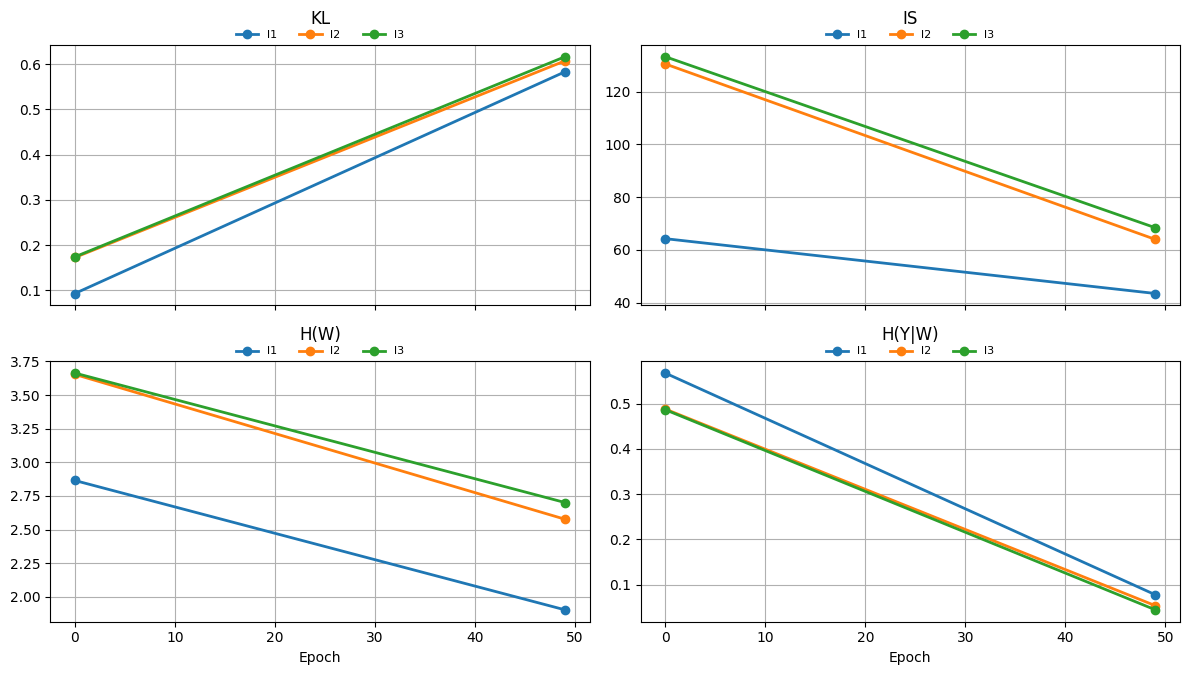

In [17]:
from visualization import plot_all_quantities
plot_all_quantities(est1.get_estimates())